# GZ-curves

This example shows how to create a GZ-curve for a free-floating vessel using the imposed-displacement method and the effect that trim may have.

Besides the standard imports, import the marine package:

In [1]:
from DAVE.scene import *
from DAVE.jupyter import *

from DAVE.marine import *

default resource folders:
C:\Users\beneden/models
C:\data\vf\virtual-float\src\virtualfloat/resources


Create a vessel with buoyancy based on the cube-with-bevel mesh

In [2]:
s = Scene()

s.new_rigidbody(name='vessel',
                mass=20.0,
                cog=(0.0,
                     0.0,
                     0.0))
# code for buoyancy
s.new_buoyancy(name='buoyancy',
          parent='vessel')
s['buoyancy'].trimesh.load_obj(s.get_resource_path('cube_with_bevel.obj'), scale = (3.0,4.0,1.0))


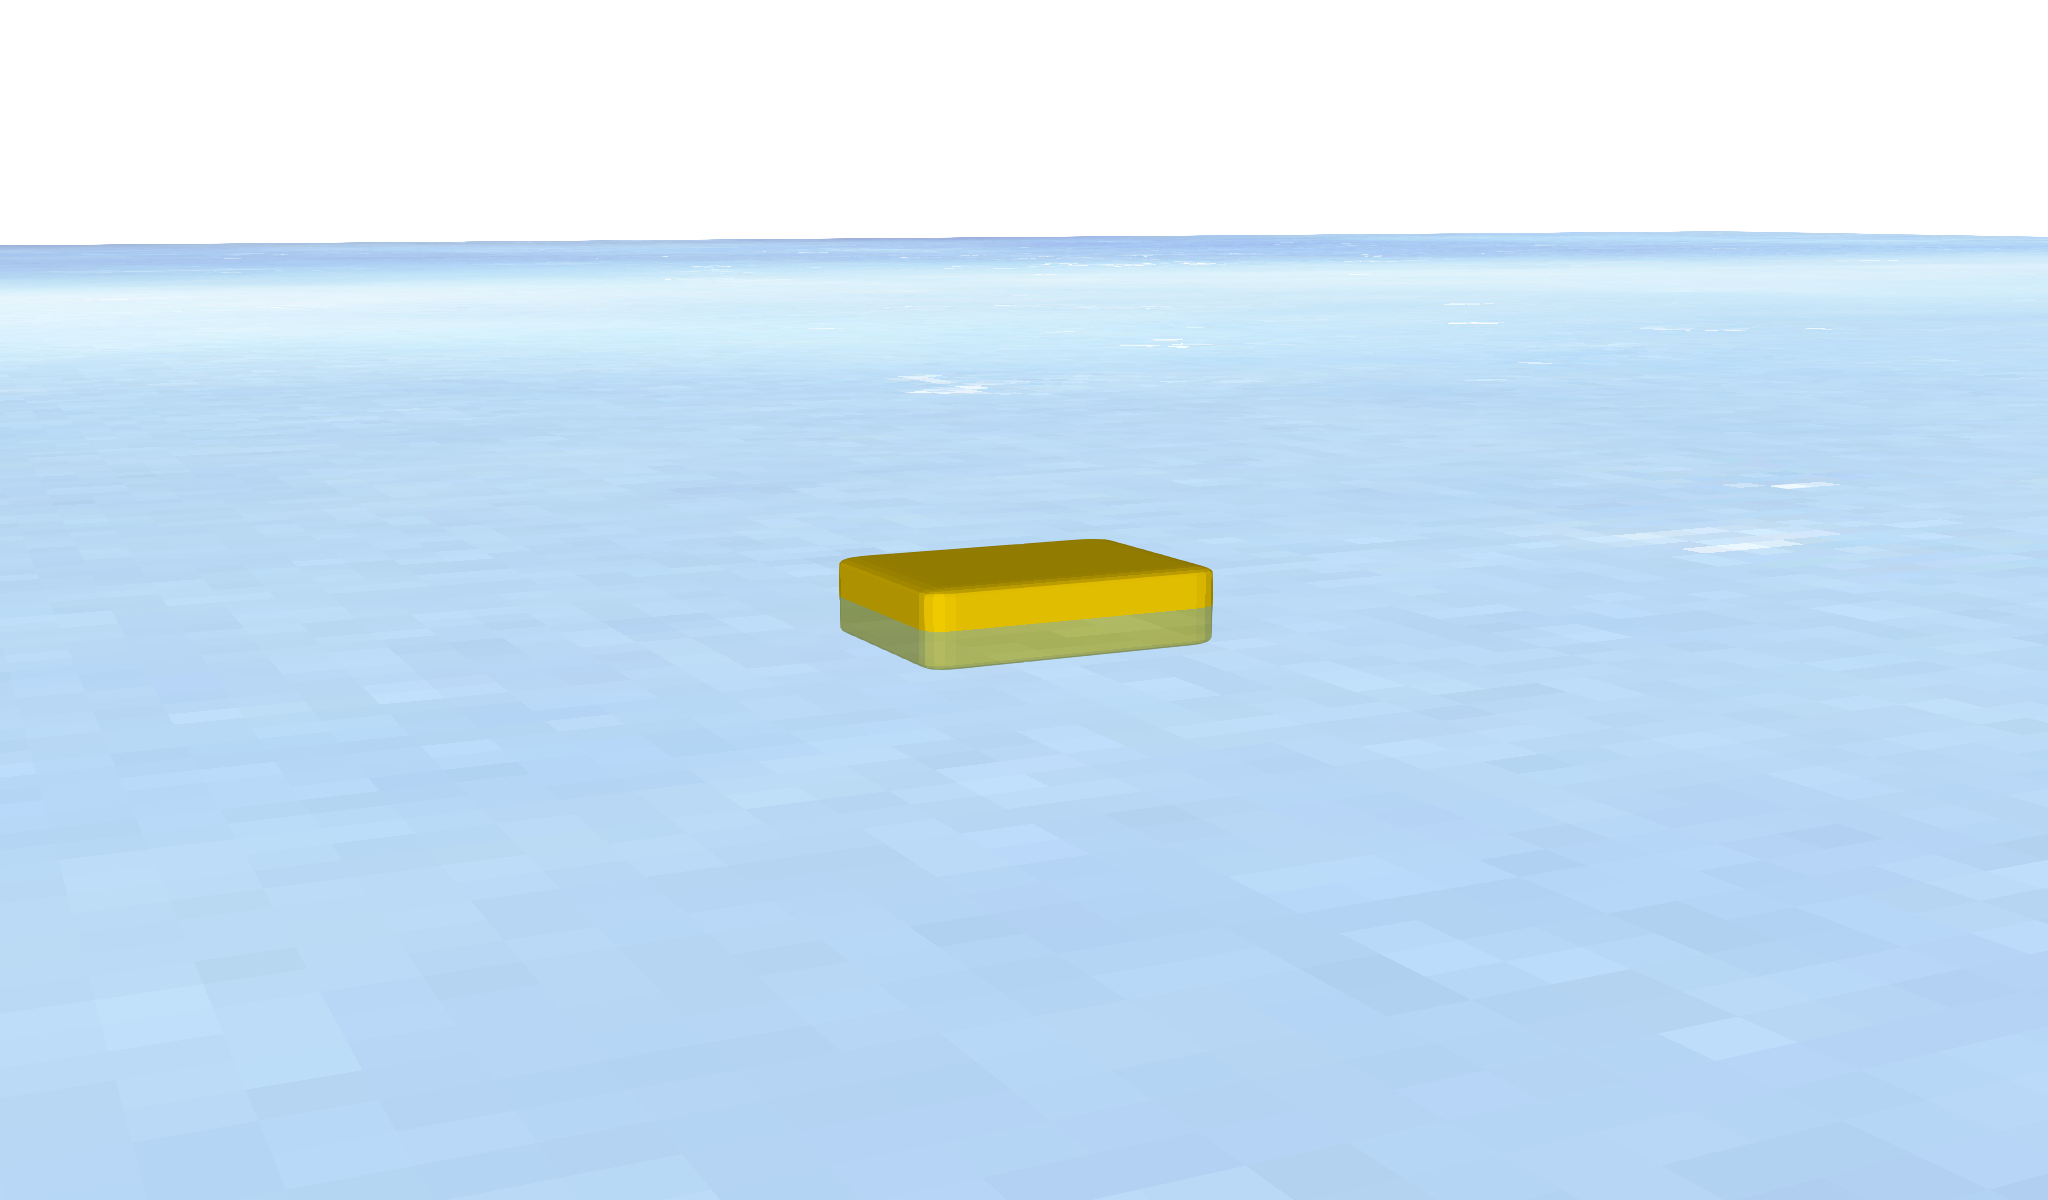

In [3]:
s.solve_statics(silent=True)
screenshot(s)

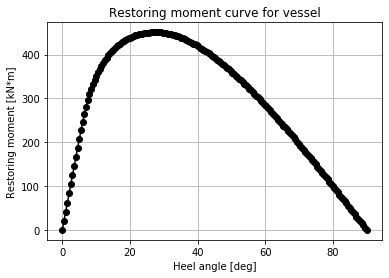

In [4]:
GZcurve_DisplacementDriven(s, 'vessel', allow_trim=False)

What would happen if we allow the vessel to pitch (the default)?

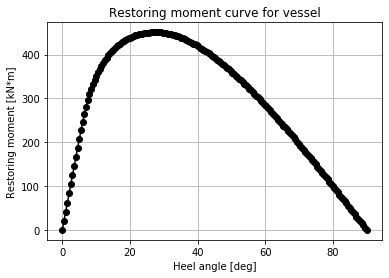

In [5]:
GZcurve_DisplacementDriven(s, 'vessel', allow_trim=False)

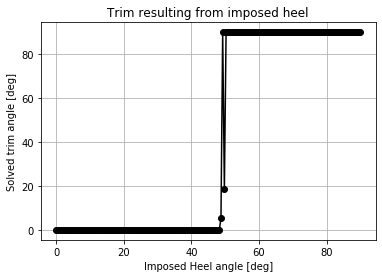

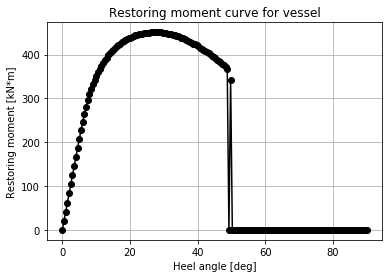

In [6]:
GZcurve_DisplacementDriven(s, 'vessel', teardown=False)

In [7]:
s.print_node_tree()

vessel_global_motion [Axis]
 |-> vessel_trim_motion [Axis]
 |    |-> vessel_heel [Axis]
 |    |    |-> vessel [RigidBody]
 |    |    |    |-> buoyancy [Buoyancy]


In [8]:
s['vessel_heel'].rx = 50

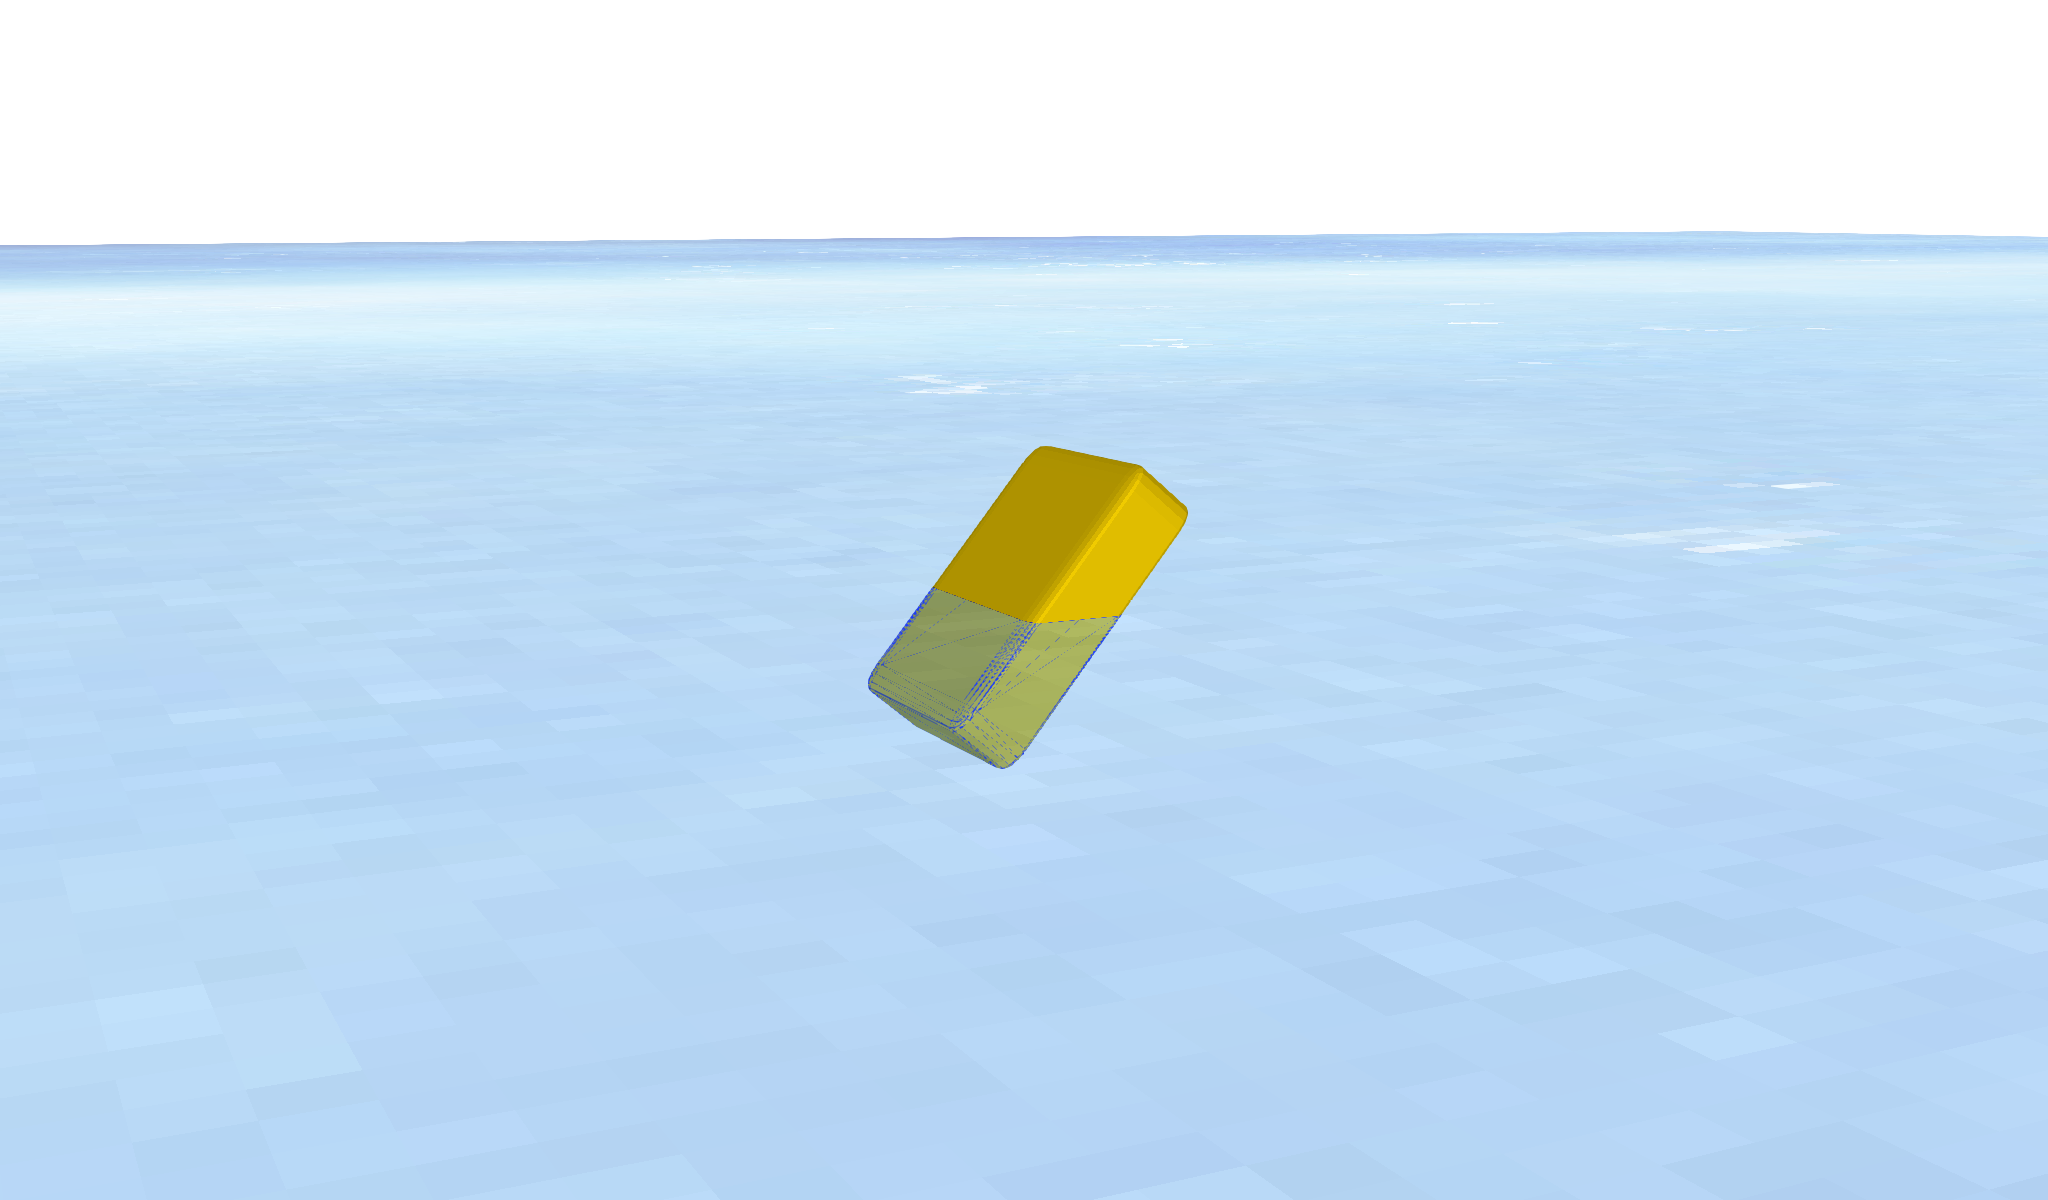

In [9]:
screenshot(s)

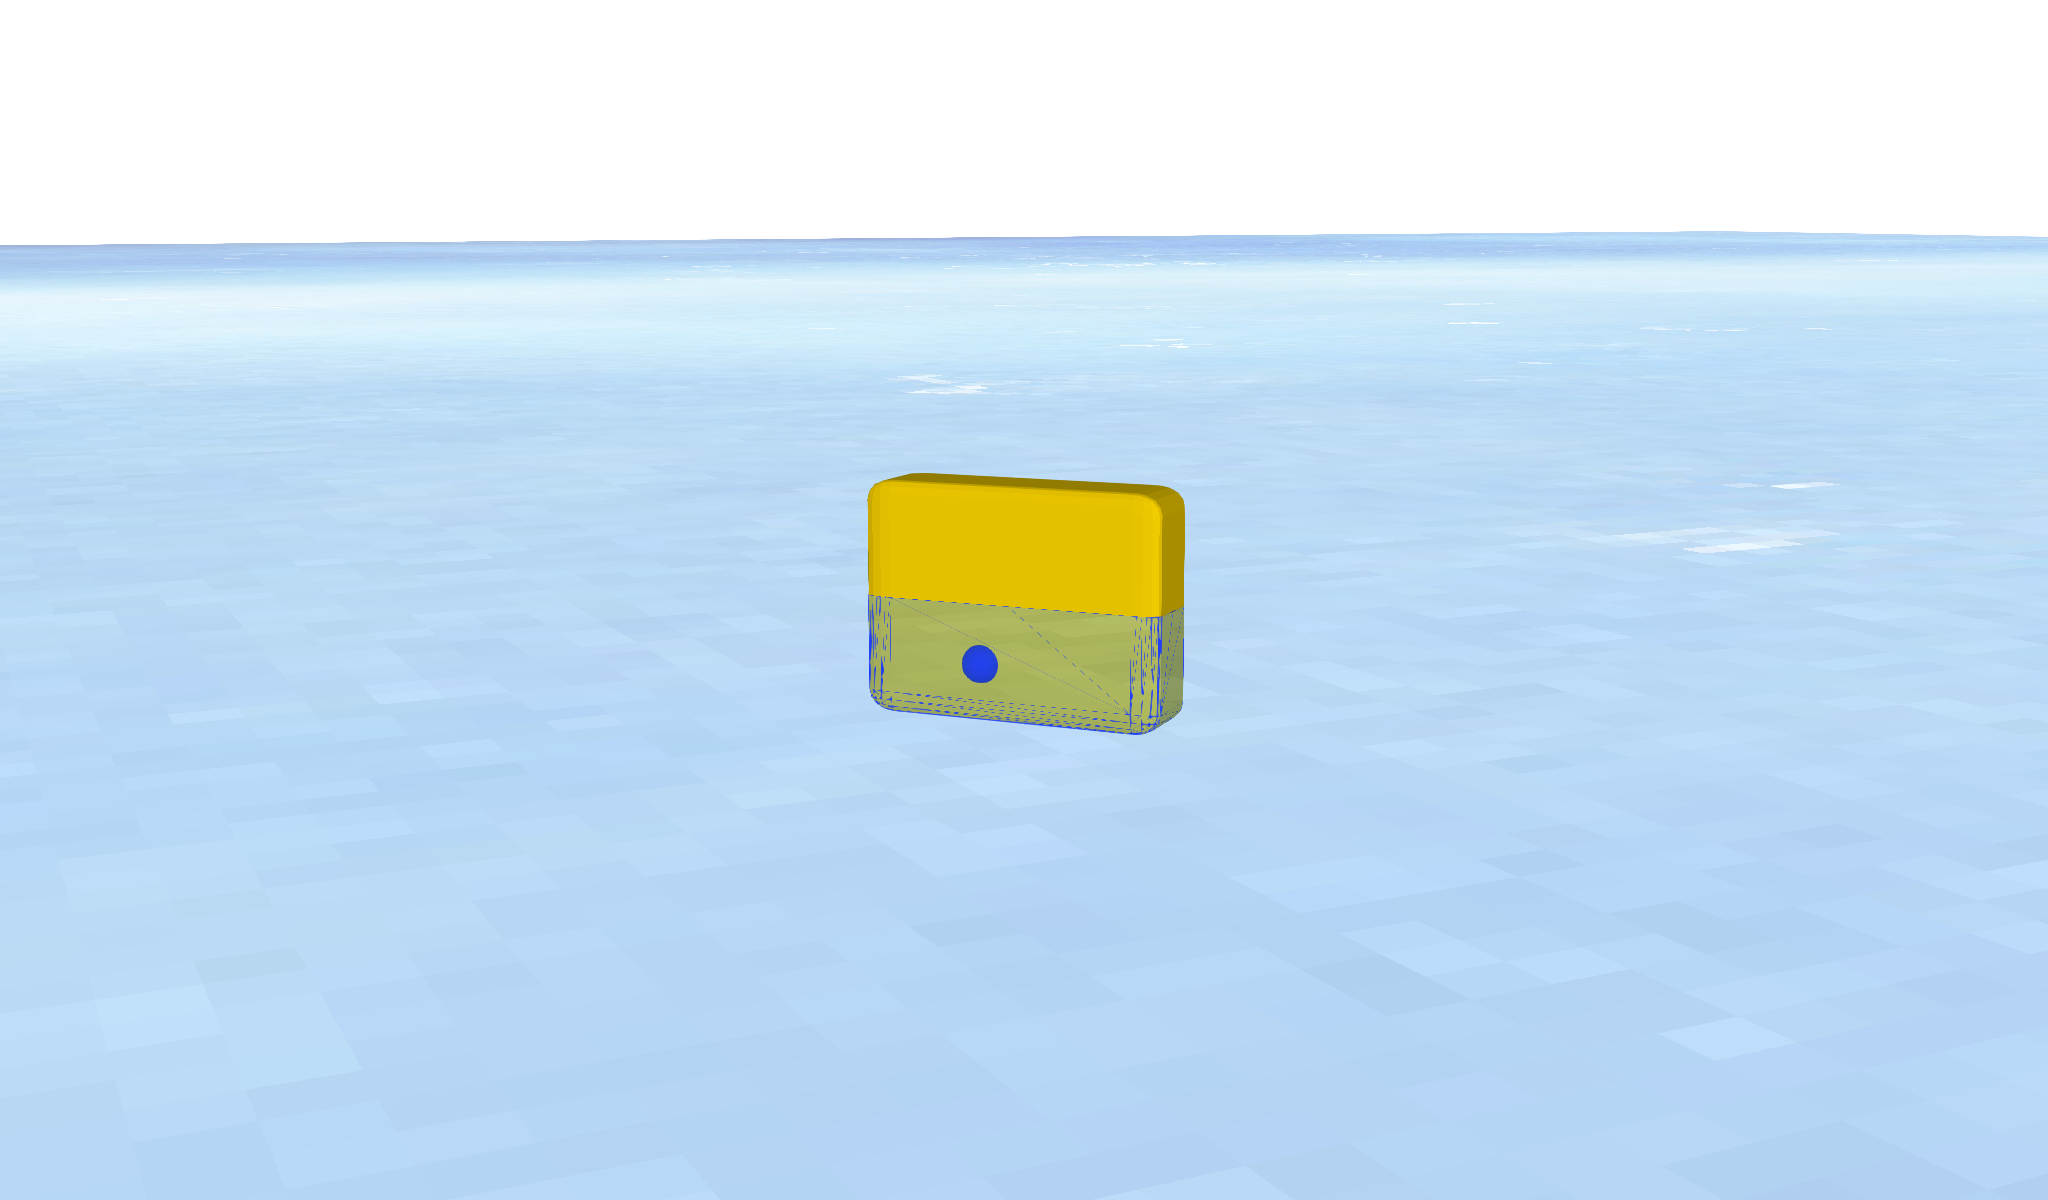

In [10]:
s['vessel_trim_motion'].ry = 90
screenshot(s)
